In [1]:
import json
import translators as ts
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
with open('../Data/corpus.json', 'r', encoding='utf-8') as file:
    corpus_data = json.load(file)

data = corpus_data['data']
df = pd.DataFrame(data)

print(f"Corpus Length: {len(df)}")
df.sample(10).style.hide(axis='index').set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_properties(**{'text-align': 'left'})

Corpus Length: 17423


English,Cajun French
I think there was much carrying on at the dance last night.,"Way, carry on Je pense qu’on a emmené au bal hier soir."
"Cousin Toutoune, she was short, and as wide as the refrigerator, poor thing.","Cousine Toutoune, elle était bassette, et large comme la glacière, pauvre bête."
We caught a downpour.,On a attrapé une ratatouille.
"You see, that new tax has generated enough money for the old folks’ pension.","Tu vois, cette nouvelle taxe a généré assez d’argent pour la rente des vieux."
Their house collapsed.,Leur maison s’a écroulé.
"So, they had made a rather bad exchange.","Ça fait, eux s’avaient rendu joliment une mauvaise échange."
"Well, that well water began to ferment the garfish balls in my stomach. It almost killed me.","Manière cette eau du puits a commencé à fermenter avec les boulettes dans mon estomac, ça a manqué de me tuer."
Be careful not to drop a stitch.,Fais attention de pas perdre un point.
She’ll turn 87 years old in January.,Alle va faire 87 ans dans janvier.
They led a good life. You couldn’t find a happier pair than those two.,I’ viviont bien. Tu pouvais pas trouver eine paire de monde plus contents que ces deux-là.


In [ ]:
# Function to check for invalid characters
def count_invalid_characters(text):
    return sum(1 for char in text if not char.isprintable())

# Iterate over each row in the DataFrame
eng_invalid_count = 0
cfr_invalid_count = 0
for index, row in df.iterrows():
    eng_invalid_count += count_invalid_characters(row['English'])
    cfr_invalid_count += count_invalid_characters(row['Cajun French'])
    if eng_invalid_count > 0 or cfr_invalid_count > 0:
        print(f"Row {index} contains invalid characters")

print(f"Total invalid characters in 'English' column: {eng_invalid_count}")
print(f"Total invalid characters in 'Cajun French' column: {cfr_invalid_count}")

# Sample of the shortest sentences included in the dataset
df.sort_values(by='English', key=lambda x: x.str.len()).head().style.hide(axis='index')

Total invalid characters in 'English' column: 0
Total invalid characters in 'Cajun French' column: 0


English,Cajun French
Beg!,Fais belle!
Fool.,Espèce de fou.
Yours.,La vôtre.
Idiot!,Espèce de tchu.
A what?,Un qué?


In [18]:
total_words_english = df['English'].apply(lambda x: len(x.split())).sum()
total_words_cajun_french = df['Cajun French'].apply(lambda x: len(x.split())).sum()

print(f'Total words in English: {total_words_english}')
print(f'Total words in Cajun French: {total_words_cajun_french}')

Total words in English: 180965
Total words in Cajun French: 185188


In [ ]:
total_chars_english = df['English'].str.len().sum()
total_chars_cajun_french = df['Cajun French'].str.len().sum()

print(f'Total characters in English: {total_chars_english}')
print(f'Total characters in Cajun French: {total_chars_cajun_french}')

# Sample of the longest sentences included in the dataset
df.sort_values(by='English', key=lambda x: x.str.len()).tail().style.hide(axis='index')

Total characters in English: 924320
Total characters in Cajun French: 998627


English,Cajun French
"How they started the cattle ranch, it’s when they used to bring the cows, the cattle, they would transfer cattle from the west and all, and there were certain places where they would stop. There was a place that was about five miles from here, they called it Vacherie. That’s where they held the cattle.","Comment ça a commencé la vacherie, c’est quand ils avaient habitude d’amener les vaches, les animaux, ils transféraient les animaux du ouest et tout, et il y avait certaines places qu’ils arrêtaient. C’était une place qu’était à peu près de cing milles d’ici, ils appelaient la Vacherie. C’est là ils tenaient les animaux."
"Years ago, when people wanted to sort of scare someone, they would go and set a string around the house, they would tie it up to a piece of metal, it would rub and make noise like small cats fighting, when a widow or a widower got married, people would ‘play the rosine, it was an old custom around here.","Des années passées, quand on était manière pour faire peur à quelqu’un, ils allaient, ils prenaient une ligne entour de la maison, ils attachaient ça sur du zinc, ça frottait et ça sonnait comme des petits chats après se battre là, quand une veuve ou un veuf se mariait, ils allaient jouer la rosine, c’était une vieille coutume entour d’ici."
She began to bounce back and said that my Hasitall and my cough syrup made her feel so good and that she has so much energy and is so active she can climb to the top of a honey locust tree with no shirt on and catch a raccoon and shove one under each arm and climb down the honey locust without a scratch.,Alle a commencé à prendre plume et a dit que mon Hasitall et mon sirop de toux y a fait tellement du bien jusqu’à présent alle a tellement de l’énergie et alle est tellement actif qu’a peut grimper à la tête d’un garofier à sans chemise et attraper un chaoui et en fourrer un dessous chaque bras et descendre de le garofer à sans une grafignure.
"They gave me a plow, a disk plow, a double harrow, a Jig Whiz [saw], a planter, shoes for all my children, a scrawny possum, turnips, a corset for my wife, a toothbrush, a set of false teeth, a clothesline, a pack of gum, forty cents in change, and a sack with two ends, with a tomcat on one side and pair of andirons on the other.","I m’avaient donné une charrue, un disque, une herse double, un djigouise, un planteur, des souliers pour tous mes petits, | un rat de bois maigre, des navéts, un corset pour ma femme, une brosse à dents, un râtelier, une corde à linge, un paquet de gomme, quarante sous en argent et un sac à deux boutes avec un matou d’un côté et une paire de chenets l’autre bord."
"When I was young my mother would scare us in the evening so we would stay around the house. She told us that there was a man who changed into a werewolf. This guy, every night he kissed his wife, he said he was going to drink beer or go to the cafe or somewhere, and halfway there he changed into a werewolf and then came to scare people.","Louisiana folklore Quand j’étais tout petit ma mère nous faisait peur le soir pour qu’on reste autour de la maison. Alle nous disait que ÿ avait un homme qui tournait rougarou. Et cet individu, tous les soirs, il embrassait sa femme, il disait qu’il allait boire de la bière ou aller au café ou quelque place, et là à moitié route il tournait rougarou puis là il venait faire peur à tout le monde."


Mean length of English sentences: 53.05
Median length of English sentences: 44.00
Mean length of Cajun French sentences: 57.32
Median length of Cajun French sentences: 47.00


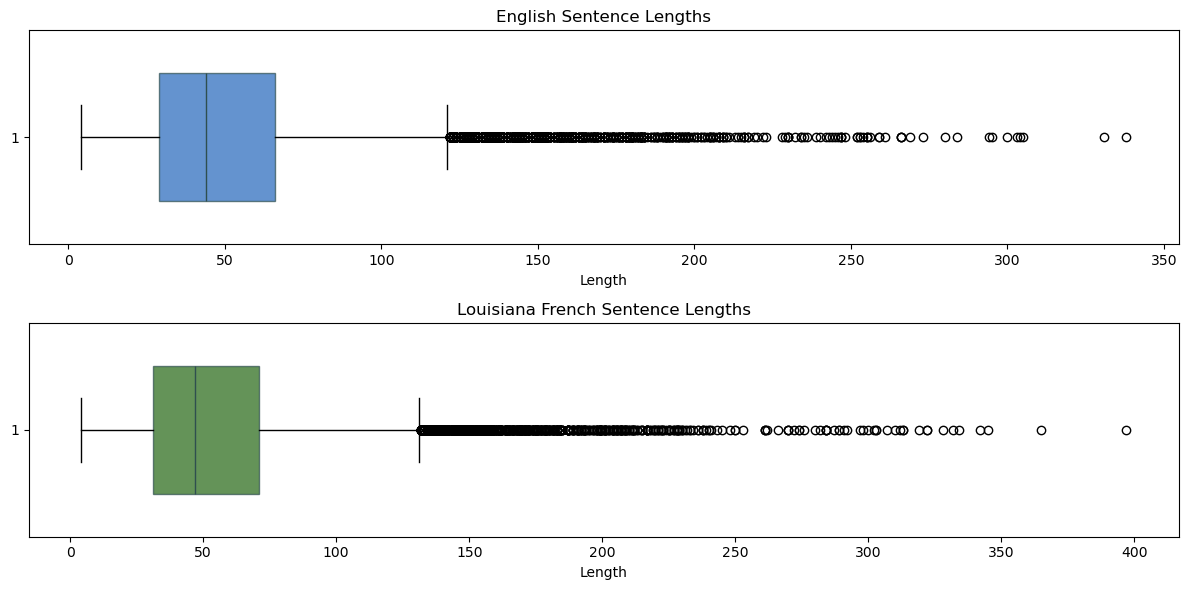

In [20]:
english_mean_length = df['English'].str.len().mean()
english_median_length = df['English'].str.len().median()
cajun_french_mean_length = df['Cajun French'].str.len().mean()
cajun_french_median_length = df['Cajun French'].str.len().median()

print(f"Mean length of English sentences: {english_mean_length:.2f}")
print(f"Median length of English sentences: {english_median_length:.2f}")
print(f"Mean length of Cajun French sentences: {cajun_french_mean_length:.2f}")
print(f"Median length of Cajun French sentences: {cajun_french_median_length:.2f}")

plt.figure(figsize=(12, 6))

# Box plot for lengths of English phrases
plt.subplot(2, 1, 1)
plt.boxplot(df['English'].str.len(), patch_artist=True, boxprops=dict(facecolor='#2266BB', color='darkslategrey', alpha=0.7), medianprops=dict(color='darkslategrey'), widths=0.6, vert=False)
plt.title('English Sentence Lengths')
plt.xlabel('Length')

# Box plot for lengths of Cajun French phrases
plt.subplot(2, 1, 2)
plt.boxplot(df['Cajun French'].str.len(), patch_artist=True, boxprops=dict(facecolor='#226611', color='darkslategrey', alpha=0.7), medianprops=dict(color='darkslategrey'), widths=0.6, vert=False)
plt.title('Louisiana French Sentence Lengths')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

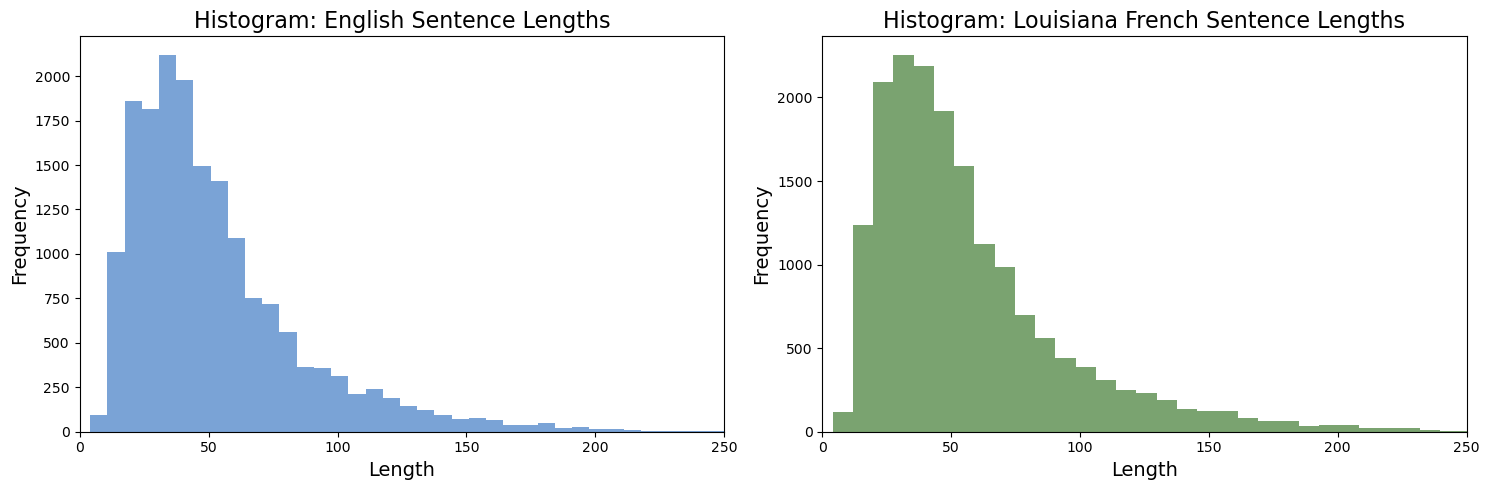

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df['English'].str.len(), bins=50, color='#2266BB', alpha=0.6)
plt.title('Histogram: English Sentence Lengths', fontsize=16)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 250)

plt.subplot(1, 2, 2)
plt.hist(df['Cajun French'].str.len(), bins=50, color='#226611', alpha=0.6)
plt.title('Histogram: Louisiana French Sentence Lengths', fontsize=16)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 250)

plt.tight_layout()
plt.show()

In [22]:
long_english_phrases = df['English'].apply(lambda x: len(x) > 256).sum()
long_cajun_french_phrases = df['Cajun French'].apply(lambda x: len(x) > 256).sum()

print(f"Number of English phrases longer than 256 characters: {long_english_phrases}")
print(f"Number of Cajun French phrases longer than 256 characters: {long_cajun_french_phrases}")

Number of English phrases longer than 256 characters: 18
Number of Cajun French phrases longer than 256 characters: 44


In [24]:
# Calculate average word per sentence for English and Cajun French
english_avg_word_per_sentence = df['English'].apply(lambda x: len(x.split())).mean()
cajun_french_avg_word_per_sentence = df['Cajun French'].apply(lambda x: len(x.split())).mean()

# Calculate average characters per word for English and Cajun French
english_avg_chars_per_word = total_chars_english / df['English'].apply(lambda x: len(x.split())).sum()
cajun_french_avg_chars_per_word = total_chars_cajun_french / df['Cajun French'].apply(lambda x: len(x.split())).sum()

# Display the results in a textual chart
print(f"{'Language':<20}{'Avg Words/Sentence':<20}{'Avg Chars/Word':<20}")
print(f"{'-'*60}")
print(f"{'English':<20}{english_avg_word_per_sentence:<20.2f}{english_avg_chars_per_word:<20.2f}")
print(f"{'Cajun French':<20}{cajun_french_avg_word_per_sentence:<20.2f}{cajun_french_avg_chars_per_word:<20.2f}")


Language            Avg Words/Sentence  Avg Chars/Word      
------------------------------------------------------------
English             10.39               5.11                
Cajun French        10.63               5.39                


English Vocabulary Size: 18894
Cajun French Vocabulary Size: 24601


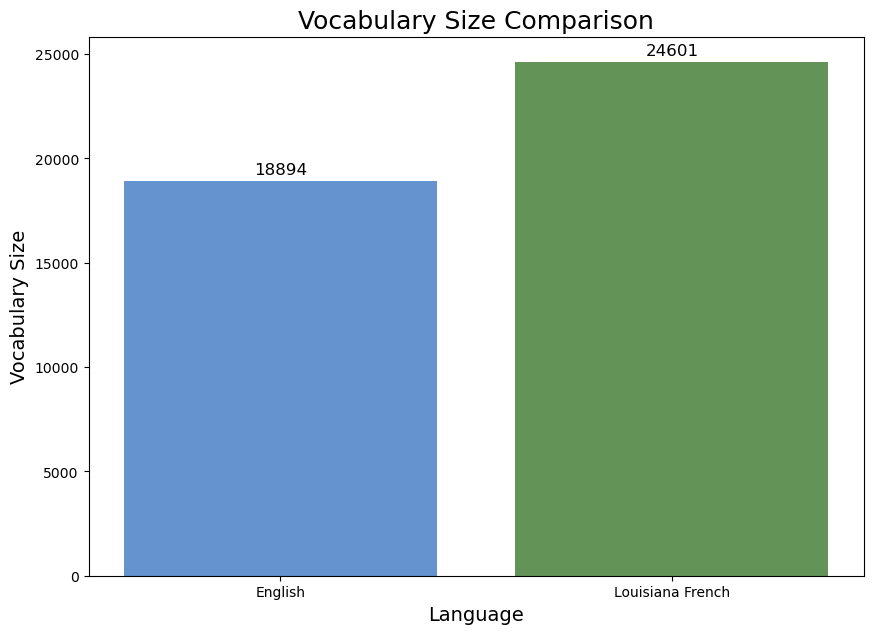

In [23]:
# Calculate vocabulary size for English and Cajun French
english_vocab = set(" ".join(df['English']).split())
cajun_french_vocab = set(" ".join(df['Cajun French']).split())

english_vocab_size = len(english_vocab)
cajun_french_vocab_size = len(cajun_french_vocab)

print(f"English Vocabulary Size: {english_vocab_size}")
print(f"Cajun French Vocabulary Size: {cajun_french_vocab_size}")

# Visualization
plt.figure(figsize=(10, 7))
vocab_sizes = [english_vocab_size, cajun_french_vocab_size]
languages = ['English', 'Louisiana French']

bars = plt.bar(languages, vocab_sizes, color=['#2266BB', '#226611'], alpha=0.7)
plt.title('Vocabulary Size Comparison', fontsize=18)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Vocabulary Size', fontsize=14)

# Display totals on the chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, yval, ha='center', va='bottom', fontsize=12)

plt.show()